# Set-up

In [2]:
# --- Standard library ---
import sys
import pickle
from enum import Enum
import random

# --- Scientific computing ---
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score

# --- Network science ---
from cdlib import algorithms

# --- Data handling and visualization ---
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# --- Project source code ---
sys.path.append("../../")
sys.path.append("../../src/")
from src.sampling.random import partial_information  # PFI observation
from src.data.observations import get_preprocessed_data  # cache loading

PALETTE = ["lightblue", "red", "blue"]
FIGROOT = "../../results/plots/"

In [16]:
metadata = {
    "PROJECT_ID": "EMB_ex37",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1",
    "DATE": "20230512"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../data/output/processed/dataframes/dataframe_{TAG}.csv")

In [17]:
df = df.replace({
    "{'imb'}": "Intercept",
    "{'emb'}": "Embedding",
    "{'deg'}": "Degree",
    "{'imb', 'emb'}": "Intercept + Embedding",
    "{'emb', 'imb'}": "Intercept + Embedding",
    "{'imb', 'deg'}": "Intercept + Degree",
    "{'deg', 'imb'}": "Intercept + Degree",
    "{'emb', 'deg'}": "Embedding + Degree",
    "{'deg', 'emb'}": "Embedding + Degree",
    "{'imb', 'emb', 'deg'}": "Intercept + Embedding + Degree",
    "{'imb', 'deg', 'emb'}": "Intercept + Embedding + Degree",
    "{'emb', 'deg', 'imb'}": "Intercept + Embedding + Degree",
    "{'emb', 'imb', 'deg'}": "Intercept + Embedding + Degree",
    "{'deg', 'imb', 'emb'}": "Intercept + Embedding + Degree",
    "{'deg', 'emb', 'imb'}": "Intercept + Embedding + Degree",
})

In [18]:
df.iloc[0]

Unnamed: 0                                                      0
system          LFR_PC-True_N-500_mu-0.1_t1-2.1_t2-1.0_kavg-6....
l1                                                              1
l2                                                              2
features                                    Intercept + Embedding
theta                                                        0.05
intercept                                                0.070078
coefficients                                [-3.5030112763706667]
accuracy                                                  0.59602
auroc                                                    0.641521
aupr                                                     0.622539
log_penalty                                                  -1.0
coef_emb                                                -3.503011
coef_deg                                                      NaN
Name: 0, dtype: object

In [8]:
# df["gamma"] = df.system.apply(lambda x: float(x.split("_")[1].split("-")[1]))

In [9]:
# df = df.drop(columns=["Unnamed: 0", "system", "l1", "l2", "log_penalty"])

# Performance analysis

## Trade-off measures

In [29]:
BOX = [(0,0),(1,1)]  # lower left, upper right

_features = ["Intercept + Embedding + Degree"]
df_ = df.query("features in @_features")

<Figure size 640x480 with 0 Axes>

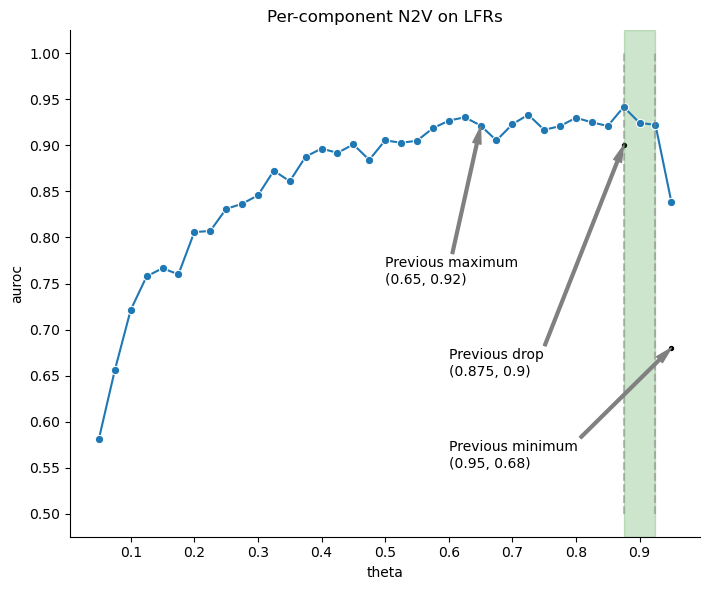

In [64]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    # hue="features", palette=PALETTE[:2],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.xticks(np.linspace(0, 1.0, 11))
plt.yticks(np.linspace(0.5, 1.0, 11))

# Figure-level attributes
plt.title("Per-component N2V on LFRs")
plt.annotate(
    "Previous maximum\n(0.65, 0.92)",
    xy=(0.65, 0.92),
    xytext=(0.5, 0.75),
    arrowprops={
        "color": "gray",
        "width": 2,
        "headwidth": 6
    })

plt.annotate(
    "Previous drop\n(0.875, 0.9)",
    xy=(0.875, 0.9),
    xytext=(0.6, 0.65),
    arrowprops={
        "color": "gray",
        "width": 2,
        "headwidth": 6
    })
plt.scatter(0.875, 0.9, color="black", marker="o", s=8)
plt.vlines(0.875, 0.5, 1.0, linestyles="--", color="gray", alpha=0.5)

plt.annotate(
    "Previous minimum\n(0.95, 0.68)",
    xy=(0.95, 0.68),
    xytext=(0.6, 0.55),
    arrowprops={
        "color": "gray",
        "width": 2,
        "headwidth": 6
    })
plt.scatter(0.95, 0.68, color="black", marker="o", s=8)


plt.vlines(0.925, 0.5, 1.0, linestyles="--", color="gray", alpha=0.5)
plt.axvspan(xmin=0.875, xmax=0.925, color="green", alpha=0.2)

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_col-gamma_hue-features_{TAG}.png",
    facecolor="white",
    transparent=False
)